# Numerical Analysis 

## Exercise 1

In the initial range of  $[0.5,1] $ , we have the following function of $ f(x)= 2x+ 3sin(4x) - e^x$ , in part (i) by hand with an accuracy of two decimals.

We can be certain that if that function f is continious along the range $[a,b] $ and $f(a)*f(b)<0$, then there is at least one root:

We find the half of the range $c= \frac{a+b}{2}$, so we do the same for us:

$f(0.5)*f(1)<0$ and $c=0.75$ => $f(0.5)*f(0.75)<0$ and $c=0.625$ => $f(0.625)*f(0.75)<0$ and $c=0.6875$ => $f(0.6875)*f(0.75)<0$ and $c=0.71875$ => $f(0.718)*f(0.75)<0$ and $c=0.734375$ =>$f(0.734)=-0.007$

In part (ii), a scipt in python has been assembeled in order to calculate the root of the function in 3, 6 and 12 decimals in accuracy.

For error 1e-12 the iteration must reach: 38 0.7337501563752085


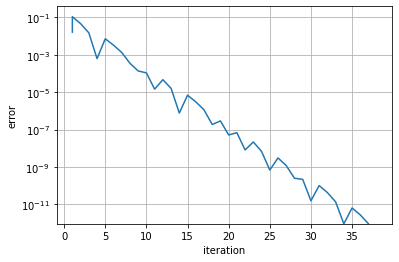

In [66]:
# Numerical Analysis Course - Physics Department Auth 
# Michael Chadolias  AEM: 14871
#
# Set 1st 
# Exercise 1b - Bolzano Method

import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 2*x+3*np.sin(4*x)-np.exp(x)

#main
diff= 10**(-12)
iteration= [1]
a ,b ,index= 0.5, 1.0 , 1
distance= [a,b]
fun=[] #function
sol=[] 
mesos= np.average(distance)

while True:
    if (f1(distance[0])*f1(mesos))<0:
        distance[-1]= mesos
        fun.append(f1(mesos))
        sol.append(mesos)
       # print('%.d %.16f'% (iteration[-1], func(mesos)))
        mesos= np.average(distance)
    else:
        distance[0]= mesos
        fun.append(f1(mesos))
        sol.append(mesos)
      #  print('%.d %.16f'% (iteration[-1], func(mesos)))
        mesos= np.average(distance)
    if len(iteration)>=2 and (np.abs(sol[-1]-sol[-2])<diff):
        print("For error", diff ,"the iteration must reach:",'%.d %.16f'%(iteration[-1], sol[-1]))
        break
    iteration.append(index)
    index= index+1    

N = len(sol)
error = sol[N-1]-sol
fig, ax = plt.subplots()
ax.plot(iteration, abs(error))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.ylim(bottom=abs(error[-2]))
plt.show()

In [57]:
print(error)

[-0.125  0.   ]


In order to confirm the theoretical prediction of the error, we plot them together and try to see the difference with the numerical data:

$\epsilon{}_{n+1}= \frac{\epsilon{}_n}{2}$

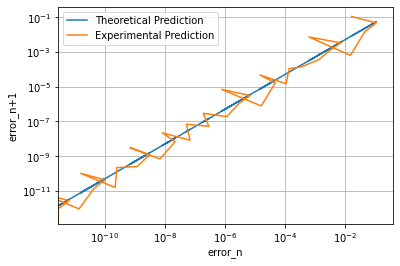

In [67]:
#Confirm the plot 
root= sol[-1]
error_n = np.array([sol[N-1]-sol[0]])
error_np1 = np.array([sol[N-1]-sol[1]])

for i in range (1,N-1):
    error_n = np.append(error_n, [sol[N-1]-sol[i]])
    error_np1 = np.append(error_np1, [sol[N-1]-sol[i+1]])
    
error_np1_predict= error_n/2
fig, ax = plt.subplots()
ax.plot(abs(error_n), abs(error_np1_predict),label="Theoretical Prediction")
ax.plot(abs(error_n), abs(error_np1),label="Experimental Prediction")
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set(xlabel='error_n', ylabel='error_n+1')
plt.xlim(left=abs(error_n[-2]))
ax.grid()
plt.show()


As part of the (iii), the initial function of $ f(x) $, is solved in the same levels of accuracy with the Linear Interpolation and Newton-Raphson

The first method that is being calculated with the Linear Interpolation,

0 0.7051330222998642
1 0.7346830667310015
2 0.7337345204727199
3 0.7337501490575554
4 0.7337501563750521
5 0.7337501563749944
6 0.7337501563749944


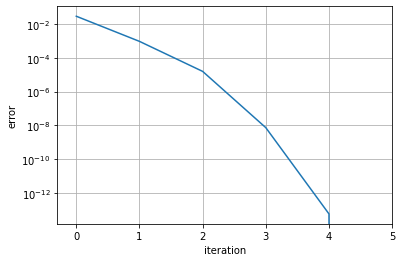

In [64]:
def f1(x):
    return 2*x+3*np.sin(4*x)-np.exp(x)
def fx(x):
    return 2+12*np.cos(4*x)-np.exp(x)
def fxx(x):
    return -48*np.sin(4*x)-np.exp(x)

#initial condition
x= [0.5,1.0]
iteration=[]
solution=[]

for i in range(0,10):
   x.append( x[i+1]- f1(x[i+1])/(f1(x[i+1])-f1(x[i]))*(x[i+1]-x[i]))
   iteration.append(i)
   solution.append(x[i+2])
   print('%.d %.16f'% (iteration[i], solution[i]))
   if x[-2]==x[-1]:
       break
   
N = len(solution)
error = solution[N-1]-solution
fig, ax = plt.subplots()
ax.plot(iteration, abs(error))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.xlim(right=N-2)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

In order to confirm the theoretical prediction of the error, we plot them together and try to see the difference with the numerical data: 

$ \epsilon{}_{n+1}= k*\epsilon{}_n^{1.618} $

<ipython-input-65-580eefb9973f>:12: RuntimeWarning: invalid value encountered in power
  error_np1_predict = k*error_n**1.618


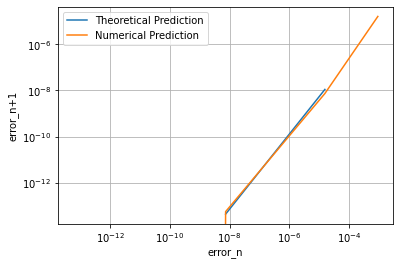

In [65]:
#Confirm the error 
root= solution[N-1]
m= 1.618
k= (fxx(root)/(2*fx(root)))**(1/m)

error_n = np.array([solution[N-1]-solution[1]])
error_np1 = np.array([solution[N-1]-solution[2]])
for i in range (2,N-1):
    error_n = np.append(error_n, [solution[N-1]-solution[i]])
    error_np1 = np.append(error_np1, [solution[N-1]-solution[i+1]])

error_np1_predict = k*error_n**1.618

NE = len(error_n)
fig, ax = plt.subplots()
ax.plot(abs(error_n), abs(error_np1_predict),label="Theoretical Prediction")
ax.plot(abs(error_n), abs(error_np1),label="Numerical Prediction")
ax.legend()
ax.set(xlabel='error_n', ylabel='error_n+1')
ax.set_xscale('log')
ax.set_yscale('log')

#plt.ylim(bottom=abs(error_np1[NE-1]))
#plt.xlim(left=abs(error_np1[NE-2]))

ax.grid()
plt.show()

The second method that is being calculated with Newton-Raphson,

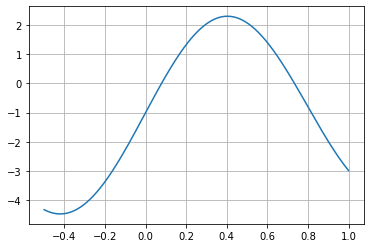

0 0.5000000000000000
1 0.9478575088524588
2 0.7012083864794754
3 0.7344929947971298
4 0.7337504322873647
5 0.7337501563750328
6 0.7337501563749944
7 0.7337501563749944


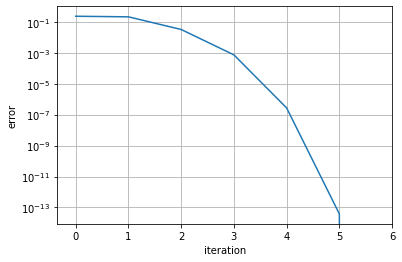

In [59]:
def f1(x):
    return 2*x+3*np.sin(4*x)-np.exp(x)

xpoints = np.linspace(-0.5,1,500)
fpoints = f1(xpoints)

plot1 = plt.plot(xpoints, fpoints)
plt.grid(True)
plt.show(plot1)

iteration = [0]
i=1
x=0.5
solution = [x]
print('%.d %.16f'% (iteration[0], solution[0]))
while True:
   x = x- f1(x)/(2+12*np.cos(4*x)-np.exp(x))
   iteration.append(i)
   solution.append(x)
   print('%.d %.16f'% (iteration[i], solution[i]))
   if solution[-1]==solution[-2]:
       break
   i=i+1

N = len(solution)
error = solution[N-1]-solution
fig, ax = plt.subplots()
ax.plot(iteration, abs(error))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.xlim(right=N-2)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

In order to confirm the theoretical prediction of the error, we plot them together and try to see the difference with the numerical data: 

$ \epsilon{}_{n+1}= k*\epsilon{}_n^{2} $

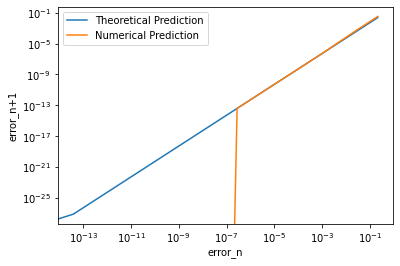

In [60]:
#confirm the convergence of the error with the theoretical prediction
root = solution[N-1]
k = (48.0*np.sin(4.0*root)+np.exp(root))/(2.0*(12.0*np.cos(4.0*root)+2.0-np.exp(root)))
                           
error_n = np.array([solution[N-1]-solution[1]])
error_np1 = np.array([solution[N-1]-solution[2]])
for i in range (2,N-1):
    error_n = np.append(error_n, [solution[N-1]-solution[i]])
    error_np1 = np.append(error_np1, [solution[N-1]-solution[i+1]])

error_np1_predict = k*error_n**2

NE = len(error_n)
fig, ax = plt.subplots()
ax.plot(abs(error_n), abs(error_np1_predict),label="Theoretical Prediction")
ax.plot(abs(error_n), abs(error_np1),label="Numerical Prediction")
ax.legend()
ax.set(xlabel='error_n', ylabel='error_n+1')
ax.set_xscale('log')
ax.set_yscale('log')

#plt.ylim(bottom=abs(error_np1[NE-1]))
#plt.xlim(left=abs(error_np1[NE-2]))

The difference can be explained in the last plot, since the maximum accuracy that we have is $10^{-16}$, the theoretical prediction reaches in the last step $10^{-28}$ and that the computers compiles it as a zero.

## Exercise 2

We have the following function of $ f(x)= 2x+ 3sin(4x) - e^x$  and must find the highest root with the $x=g(x)$ Picard Method.

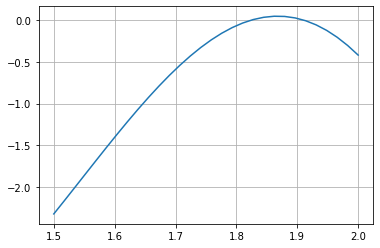

0 1.9026684162470726
1 1.9046380352537744
2 1.9060577456621874
3 1.9070631557944497
4 1.9077661005910389
5 1.9082531132569118
6 1.9085883739379528
7 1.9088181458896096
8 1.9089751395610850
9 1.9090821818302084
10 1.9091550612495749
11 1.9092046324149776
12 1.9092383272739883
13 1.9092612201869379
14 1.9092767692589345
15 1.9092873281143536
16 1.9092944972593850
17 1.9092993644223732
18 1.9093026685430157
19 1.9093049114772600
20 1.9093064340008961
21 1.9093074674821966
22 1.9093081689942637
23 1.9093086451659385
24 1.9093089683792053
25 1.9093091877672237
26 1.9093093366811611
27 1.9093094377592250
28 1.9093095063677197
29 1.9093095529368862
30 1.9093095845464692
31 1.9093096060019812
32 1.9093096205652504
33 1.9093096304502983
34 1.9093096371599292
35 1.9093096417141955
36 1.9093096448054745
37 1.9093096469037281
38 1.9093096483279501
39 1.9093096492946631
40 1.9093096499508344
41 1.9093096503962208
42 1.9093096506985336
43 1.9093096509037331
44 1.9093096510430154
45 1.909309651137555

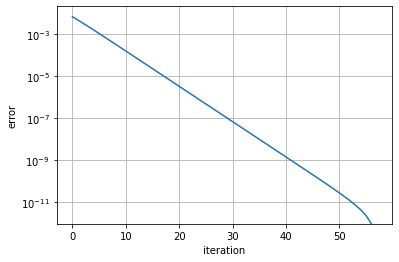

In [61]:
def f1(x):
    return 2*x+3*np.sin(4*x)-np.exp(x)

def z1(x): #our final function
    return np.log(2*x+3*np.sin(4*x))
"""
def g1x(x):
    return (np.exp(x)-6*np.cos(4*x))/2
"""
xpoints = np.linspace(1.5,2,30)
fpoints = f1(xpoints)
zpoints= z1(xpoints)


#last root is arround 1.9
#try to plot the function in order to see the highest root
plot1 = plt.plot(xpoints, fpoints)
plt.grid(True)
plt.show(plot1)

#x=1.75
x=1.9 
diff= 10**(-12)
sol=[]
iteration=[]

for i in range(0,500):
    xnew=z1(x)
    sol.append(xnew)
    iteration.append(i)
    x=xnew
    print('%.d %.16f'% (iteration[i], sol[i]))
    if len(iteration)>=2 and (sol[-1]-sol[-2]<diff): #stop the loop until the error is in the order of 10^{-12}
        break

N = len(sol) #plot again the errors to see how the error is changing as a function of iterations(loops)
error = sol[N-1]-sol
fig, ax = plt.subplots()
ax.plot(iteration, abs(error))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.ylim(bottom=abs(error[-2]))
plt.show() 

## Exercise 3

In the last exercise we need to solve the follwing system of two equations, with Newton Raphson and Picard Method:

$ y= 2x-e^x+3  (1)$


$ y= 0.5x-2x^3  (2)$

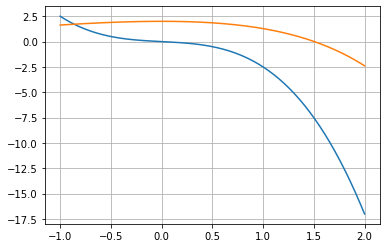

0.2091298491725497 2.8497858295509766
-3.7534141437114421 -0.8551816279535052
-2.4929025375946390 -2.0387860189558600
-1.6711259478535896 -0.4928575582526900
-1.1714283838626569 0.3751472580881861
-0.9292648184769852 0.7564941434422234
-0.8666461794877903 0.8471391686715912
-0.8626788523286504 0.8526155972893144
-0.8626635126018880 0.8526364903795486
-0.8626635123732046 0.8526364906907490
-0.8626635123732045 0.8526364906907490
-0.8626635123732045 0.8526364906907489
-0.8626635123732045 0.8526364906907489
-0.8626635123732045 0.8526364906907489


In [62]:
#functions and derivatives
def f1(x,y):
    return 2*x-np.exp(x)+3-y
def g1(x,y):
    return 0.5*x-2*x**3-y
def fx(x):
    return 2-np.exp(x)
def gx(x):
    return 0.5-6*x**2
fy,gy=-1,-1

xpoints = np.linspace(-1,2,300)
ypoints = np.linspace(-1,2,300)
fpoints = f1(xpoints,ypoints)
gpoints= g1(xpoints,ypoints)


plot1 = plt.plot(ypoints, gpoints, ypoints,fpoints)
plt.grid(True)
plt.show(plot1)

#initial conditions
x,y= 1,-1
x_sol, y_sol=[],[]
iteration=[]

for i in range(1,15):
    xnew =  x - (f1(x,y)*gy-g1(x,y)*fy)/(fx(x)*gy-gx(x)*fy)
    ynew =  y - (g1(x,y)*fx(x)-f1(x,y)*gx(x))/(fx(x)*gy-gx(x)*fy)
    x = xnew
    y = ynew
    x_sol.append(xnew)
    y_sol.append(ynew)
    iteration.append(i)
    print('%.16f'% x, '%.16f'% y)

Unfortunately, we tried the Picard method, but couldn't find the appropriate functions to solve the system with this method.

# Link for Google Colab

https://colab.research.google.com/github/MisterBoson/numerics/blob/main/Numerical%20Analysis%20First%20Set%20.ipynb